# Proyecto integrador
# Héctor Ariel Aragón

## Introducción:

En el siguiente notebook se muestra el desarrollo de la solución para el concurso de "American Express", el objetivo de esta competencia es poder predecir  la probabilidad de que un cliente no pague un crédito que ha sido otorgado por la institución crediticia American Express, por lo tanto vamos a encontrar dentro de la variable objetivo una variable categoríca binaria, es decir de 0 y 1, donde 0 es que  se pagara el credito y 1 donde se considera que el crédito no será pagado, o en pocas palabras, donde los que no pagan tienen marca de 1 y los que han pagado de 0. Una de las primeras características que incluso en Kaggle se ha brindado es que estamos hablando de un data set desequilibrado, donde el 75% de los datos son 0 y el resto son 1, más adelante se hace el análisis y tratamiento de este problema en los datos. Ahora, anteriormente ya se habían cubierto ciertos puntos, donde bajo ciertas instrucciones se solicitaron completar ciertos puntos, a continuación se abordan los putnos que se pidieron anteriormente, y bajo estos se termino de construir la solución.

Instrucciones

- Explorar los datos del problema
- Describir cual es la relación de tu variable objetivo con las demás variables presentes. 
- Determinar cuales son las variables que tienen mayor correlación con tu objetivo. 
- Aplicar ingeniería de características para diseñar nuevas características en tu conjunto de datos. 
- Modelar tus datos de dos o más formas diferentes para comparar los resultados. 

## Exploración de los datos del problema:

En lo siguiente se hace una exploración de la data en cuestión de registros, y se hace un proceso para poder cargar los datos sin afectar la calidad proveniente, pero si comprendiendo la cantidad de datos que se tenian, en total el data set pesa mas de 16 gb, cuenta con más de 5 millones de registros y 190 columnas, esto lleva a una cantidad enorme de datos, por lo que trabajar con tanta información llevo un reto grande, se tuvo que hacer una selección de la forma más equilibrada para poder dividir los datos de los clientes que pagan y de los que no pagan en la misma proporción. Las siguientes lineas de código muestran como se hizo el procedimiento para poder extraer una muestra que nos permita entender los datos y analizar como se ven.  

In [15]:
### En este código se puede observar que se han desarrollado la selección de los datos por el tipo de etiqueta, es decir, aquellas
### que tienen etiqueta 0 y 1, como se mencionó anteriormente es un dataset desequilibrado, por lo que se realizo una descarga 
### de un subconjunto de datos.
import sys
import random
import pandas as pd
import numpy as np

df_trlab_s=pd.read_csv('train_labels.csv')

df_trlab1_s=df_trlab_s[df_trlab_s['target']==1]
df_trlab0_s=df_trlab_s[df_trlab_s['target']==0]

indx_0=df_trlab0_s.index
indx_1=list(df_trlab1_s.index)

lst_indx_0=random.sample(list(indx_0),len(df_trlab1_s))

# Se obtienen muestras para balancear los datos en listas
sublst_indx_0 = random.sample(lst_indx_0,3000)
sublst_indx_1 = random.sample(list(df_trlab1_s.index),3000)

# Una vez que se han obtenido las listas se unen para obtener de todo el data set
# los elementos necesarios.
sblst_tot = np.concatenate((sublst_indx_0,sublst_indx_1))

indx_tot = list(df_trlab_s.index)
lst_disc = [x for x in indx_tot if x not in sblst_tot]

df_trlab0_rs = df_trlab0_s.loc[sublst_indx_0]
df_trlab1_rs = df_trlab1_s.loc[sublst_indx_1]
df_label = pd.concat([df_trlab0_rs, df_trlab1_rs], ignore_index=True)


6000

In [2]:
df_label.to_csv('df_label.csv',index=False)
customers_filter=df_label['customer_ID']

# El siguiente codigo se ha comentado, ya que no fue necesario volver a leer la base
# completa de mas de 15GB de información, adicional se dejan como evidencia de los 
# pasos que se siguieron.
# 
#df_train=pd.read_csv('train_data.csv',header=0)
#df_train=df_train[df_train['customer_ID'].isin(customers_filter)]
#df_train.head()
# Con lo siguiente se escribio el dataset seleccionado 
#df_train.to_csv('df_train.csv',index=False)

# Leemos los archivos necesarios para la etiqueta y la data cruda
df_train = pd.read_csv('df_train.csv')
df_label = pd.read_csv('df_label.csv')
df = pd.merge(df_train,df_label,how='left',on='customer_ID')

In [4]:
# Para entender que tanta informaciòn se tenía disponible en cada uno de los campos
# para lo cual se hace un for que nos va a informar de la cantidad de Nan values con
# respecto al total de registros. Por default se van eliminando aquellas que tienen mas 
# del 50% de los datos con NaN.
clnames = df.columns
columnas_validas = []
for col in clnames:
    nas=df[col].isna().sum()
    if nas/70963>.50:
        print('La columna '+str(col)+' tiene '+str(nas)+' valores con nan de 70963')
    else:
        columnas_validas.append(col)

La columna D_42 tiene 57641 valores con nan de 70963
La columna D_49 tiene 61407 valores con nan de 70963
La columna D_50 tiene 43451 valores con nan de 70963
La columna D_53 tiene 47821 valores con nan de 70963
La columna D_56 tiene 42516 valores con nan de 70963
La columna S_9 tiene 38632 valores con nan de 70963
La columna D_66 tiene 63228 valores con nan de 70963
La columna D_73 tiene 70152 valores con nan de 70963
La columna D_76 tiene 64853 valores con nan de 70963
La columna D_77 tiene 35838 valores con nan de 70963
La columna R_9 tiene 65060 valores con nan de 70963
La columna D_82 tiene 52615 valores con nan de 70963
La columna B_29 tiene 66159 valores con nan de 70963
La columna D_87 tiene 70885 valores con nan de 70963
La columna D_88 tiene 70855 valores con nan de 70963
La columna D_105 tiene 37240 valores con nan de 70963
La columna D_106 tiene 61479 valores con nan de 70963
La columna R_26 tiene 59920 valores con nan de 70963
La columna D_108 tiene 70453 valores con nan d

In [6]:
# Finalmente nos quedamos con las columnas seleccionadas por el proceso anterior.
df_filtr=df[columnas_validas]
df_filtr.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-03-01,0.916396,0.005509,0.029336,1.005511,0.002886,0.063525,0.000707,0.004927,...,0.001752,0.004597,0.001712,0.006207,0.001325,0.004492,0.001634,0.006315,0.001055,0
1,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-04-25,0.885999,0.009377,0.008894,1.006219,0.008716,0.065198,0.001650,0.009946,...,0.008840,0.005077,0.001755,0.001505,0.009169,0.009822,0.004713,0.002896,0.002524,0
2,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-05-15,0.884029,0.095100,0.043179,1.003697,0.009204,0.076264,0.003598,0.003521,...,0.007685,0.001108,0.009397,0.006932,0.009402,0.000233,0.006104,0.005291,0.001346,0
3,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-06-08,0.854829,0.005041,0.026992,1.007905,0.000289,0.080966,0.000594,0.003355,...,0.009221,0.001987,0.008074,0.003134,0.002783,0.008140,0.008004,0.002397,0.004418,0
4,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-07-18,0.843463,0.001606,0.010679,0.815807,0.008121,0.089003,0.007650,0.005067,...,0.006336,0.006694,0.002498,0.002171,0.005994,0.003247,0.004073,0.004119,0.001600,0


In [7]:
# Convertimos varialbes que identificamos no tenian el tipo categorìa y podian gener 
# problemas más adelante.
df_filtr['D_63'] = df_filtr['D_63'].astype('category').cat.codes
df_filtr['D_64'] = df_filtr['D_64'].astype('category').cat.codes

<ipython-input-7-608c1fb0db21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtr['D_63'] = df_filtr['D_63'].astype('category').cat.codes
<ipython-input-7-608c1fb0db21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtr['D_64'] = df_filtr['D_64'].astype('category').cat.codes


## Asociación lineal de la variable objetivo con el resto de variables presentes. 

A continuación se muestra mediante un for cuales son las variables que presentan un mayor grado de asociación lineal entre las variables. Después se arma un mapa de correlaciones, no solo para entender las variables que tienen un mayor grado de asociación con la variable dependiente, si no también para entender cuales tienen un mayor de asociación entre estas. 

In [10]:
# Nos quedamos con las variables que tienen una mayor correlación, es decir, 
# se discriminan por el momento, todas aquellas que tienen una correlacion 
# en terminos absolutos menor a 0.3. Con el siguiente for hacemos lo
# anteriormente mencionado.
col_est_cor = df_filtr.columns[2:]

col_corr = []
for col in col_est_cor:
    cor = df_filtr[col].corr(df_filtr['target'])
    if ((cor >0.3 ) or (cor < -0.3)):
        col_corr.append(col)
        


## Determina cuales son las variables que tienen mayor correlación con tu objetivo. 

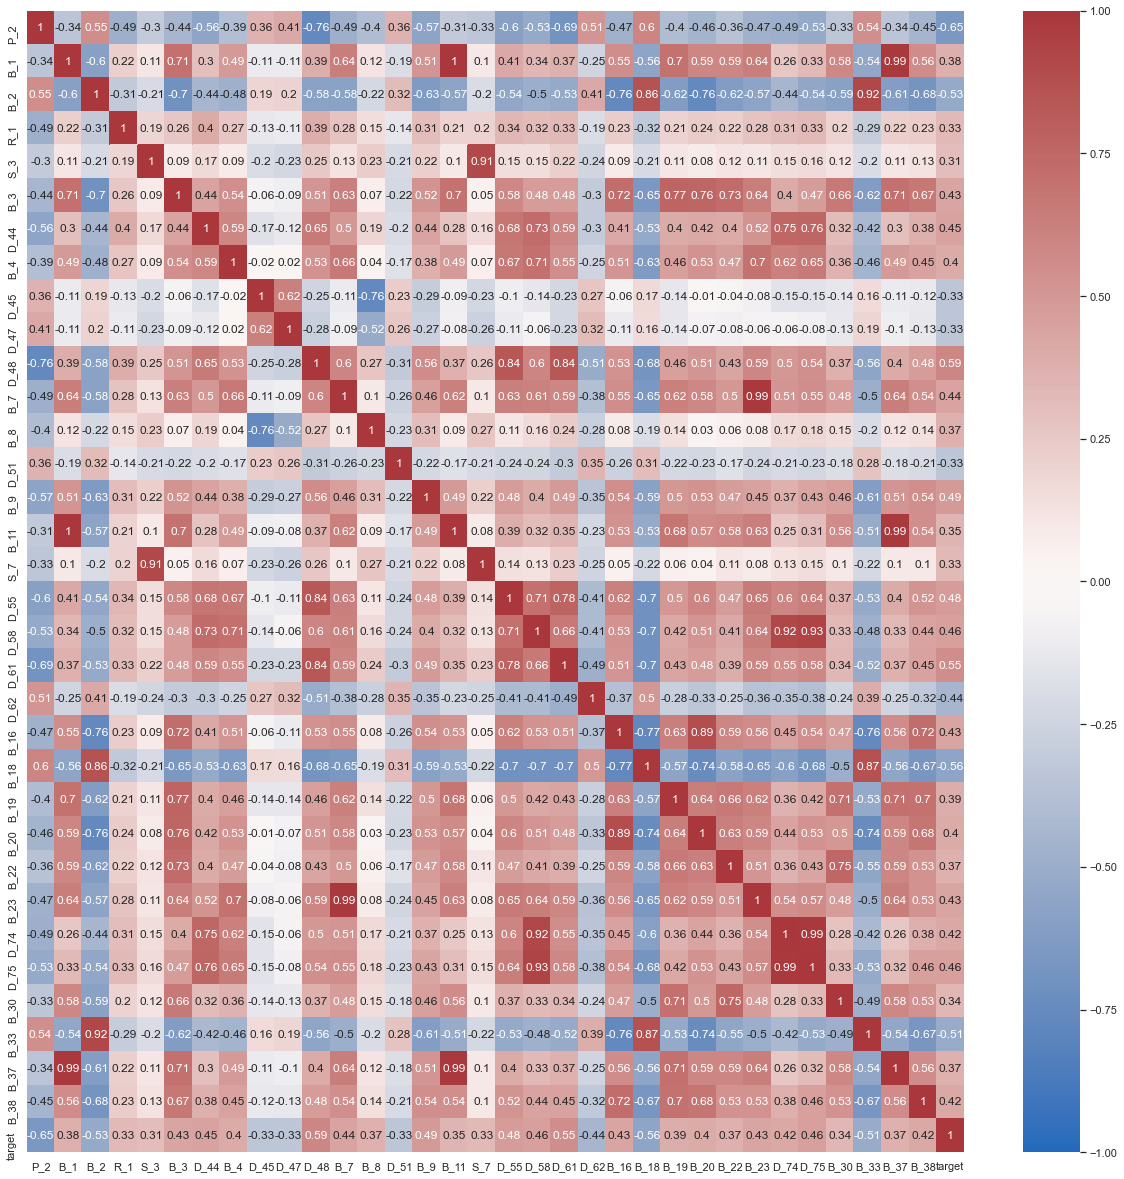

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Para poder entender mejor que variables tienen una mayor correlación, dibujamos el mapa de 
# correlaciones. 
matrix = df_filtr[col_corr].corr().round(2)
sns.set(rc = {'figure.figsize':(21,21)})
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()


Como se puede observar las que mayor grado de asociación tienen entre las variables son target con B13, B18, D_61, D_48, B_2 y P_2, esto pensando en las variables que han presentado una correlación en términos absolutos mayores a 0.5, si buscamos un umbral de .3, serán todas las presentes en el mapa de correlación de arriba

## Ingeniería de características para diseñar nuevas características en los datos.

En las siguientes líneas de código se pueden observar las transformaciones y lo que se hizo para poder transformar los datos, es importante mencionar que se consideraron un subconjunto de variables que son las que tienen una correlación mayor a 0.3, y que generaron un subconjunto, adicional a eso, anteriormente se habían discriminado ya que no contaban con datos suficientes en cuestión de valores. Una vez considerrada este conjunto de variables mas pequeño se procedio a la ingenieria de variables, es importante mencionar, que en cuestion de creación no se podía hacer mucho, ya que las variables presentan una estandarización, por lo que la información original, no se cuenta como tal, y como vimos en los cursos de ingeniería de variables muchas transformaciones o transformaciones muy sofisticadas llevan a un proceso de machine learning mas complejo en cuestión de aprendizaje de patrones en los datos. Por lo tanto las transformaciones son simples, una transformación es contar los datos entre transacciones de los clientes para entender en promedio que tanto se usaban las tarjetas tanto por parte de los clientes que pagan así como de los clientes que no, tambien se usaron las variables categóricas para entender la frecuencia de aparición entre las diferentes variables categóricas. Y finalmetne el resto de variables continuas se uso el promedio para tener por cliente un valor de cada variable. 

In [12]:
# Se hacen modificaciones muy pequeñas a los datos, para garantizar tener lo que 
# realmente se necesita para poder modelar. 
col_corr.append('customer_ID')
col_corr.append('S_2')
df_fin =  df_filtr[col_corr]
df_fin['S_2'] = pd.to_datetime(df_fin['S_2'])

# Se hace la estimación del tiempo que ha pasado entre transacciones de un mismo cliente.
df_fin['diff'] = df_fin.groupby('customer_ID',as_index=False)['S_2'].diff()
df_fin['diff'] = df_fin['diff'].dt.days

# Tambien generamos el conteo de las columnas B30, B38, para tener un mecanismo de que 
# tantas veces se han incumplido con prestamos. 
df_b30=df_fin.groupby('customer_ID',as_index=False)['B_30'].count()
df_b38=df_fin.groupby('customer_ID',as_index=False)['B_38'].count()

# Se hace el group by para poder tener los promedios del resto de variables
df_fin_res = df_fin.groupby(['customer_ID','target'],as_index=False).agg({'P_2':'mean', 'B_1':'mean','B_2':'mean', 'R_1':'mean', 'S_3':'mean'
                                                                         ,'B_3':'mean','D_44':'mean','B_4':'mean','D_45':'mean','D_47':'mean',
                                                                         'D_48':'mean','B_7':'mean','B_8':'mean','D_51':'mean','B_9':'mean', 
                                                                         'B_11':'mean','S_7':'mean','D_55':'mean','D_58':'mean','D_61':'mean',
                                                                         'D_62':'mean','B_16':'mean','B_18':'mean','B_19':'mean','B_20':'mean',
                                                                         'B_22':'mean','B_23':'mean','D_74':'mean','D_75':'mean','B_33':'mean',
                                                                         'B_37':'mean','diff':'mean'})

# Se arma el data set final, al  cual se agregan las transformaciones previamente
# realizadas.
df_fin_res = pd.merge(df_fin_res,df_b30,how='left',on='customer_ID')
df_fin_res = pd.merge(df_fin_res,df_b38,how='left',on='customer_ID')
df_fin_res.head()

<ipython-input-12-baa0cf237a1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['S_2'] = pd.to_datetime(df_fin['S_2'])
<ipython-input-12-baa0cf237a1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['diff'] = df_fin.groupby('customer_ID',as_index=False)['S_2'].diff()
<ipython-input-12-baa0cf237a1e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,customer_ID,target,P_2,B_1,B_2,R_1,S_3,B_3,D_44,B_4,...,B_20,B_22,B_23,D_74,D_75,B_33,B_37,diff,B_30,B_38
0,000adf2938f771f75a581b65107024eddeae70684778c0...,0,0.845936,0.031278,0.976413,0.005752,0.050196,0.007886,0.005557,0.020059,...,0.004239,0.004350,0.023782,0.005210,0.005489,1.005655,0.030871,30.583333,13,13
1,001adb0774c0df8e6405c3f27dd84887b633b8143f9147...,0,0.470471,0.163761,0.139273,0.005011,0.345274,0.139596,0.322825,0.202253,...,0.353082,0.042510,0.232733,0.478729,0.507636,0.082539,0.162870,29.583333,13,13
2,001f0681a75ca4c48191fe04f19cf5b66c6ce0c546ad4a...,0,0.713143,0.059170,0.579636,0.004541,0.283188,0.039333,0.025084,0.012413,...,0.063678,0.082641,0.030790,0.009651,0.034976,0.621259,0.059403,29.500000,13,13
3,00229b900623d8826af93d0246efe7434a56c42c35c9f2...,1,0.506346,0.019724,0.961826,0.024299,0.619154,0.011243,0.005249,0.066928,...,0.004295,0.004633,0.067337,0.108924,0.102645,1.004996,0.019305,28.666667,13,13
4,002d91896f5792a0a8cf1f0ae0395a114a7e58cae4644e...,0,0.950513,0.005217,0.814894,0.004747,NaN,0.006931,0.003493,0.006577,...,0.005879,0.005586,0.007895,0.005782,0.005747,1.005608,0.006202,30.416667,13,13


In [13]:
# Se rellenan los espacios vacios con 0, indicando que no hay información
# se muestran cuales son las variables con las que al final nos quedamos.
df_fin_res = df_fin_res.fillna(0)
df_fin_res.columns

Index(['customer_ID', 'target', 'P_2', 'B_1', 'B_2', 'R_1', 'S_3', 'B_3',
       'D_44', 'B_4', 'D_45', 'D_47', 'D_48', 'B_7', 'B_8', 'D_51', 'B_9',
       'B_11', 'S_7', 'D_55', 'D_58', 'D_61', 'D_62', 'B_16', 'B_18', 'B_19',
       'B_20', 'B_22', 'B_23', 'D_74', 'D_75', 'B_33', 'B_37', 'diff', 'B_30',
       'B_38'],
      dtype='object')

## Modelos aplicados a los datos y comparación de los resultados:

En lo siguiente se puede observar que se usaron 3 modelos diferentes, el primero, la regresión logística, el segundo, una máquina de soporte vectorial y el tercer modelo fue un árbol de decisión. Los resultados se pueden ver en las matrices de confusión y como se puede observar los 2 mejores modelos fueron la regresión logística y la máquina de soporte vectorial lineal. 

In [14]:
# Lo primero que se hace es hacer la división de los datasets en
# train y test, para poder probar los algoritmos. Como se puede observar
# se cargan algunas librerias que se usarana en los ejercicios
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


y = df_fin_res['target']
X = df_fin_res[['P_2', 'B_1', 'B_2', 'R_1', 'S_3', 'B_3',
       'D_44', 'B_4', 'D_45', 'D_47', 'D_48', 'B_7', 'B_8', 'D_51', 'B_9',
       'B_11', 'S_7', 'D_55', 'D_58', 'D_61', 'D_62', 'B_16', 'B_18', 'B_19',
       'B_20', 'B_22', 'B_23', 'D_74', 'D_75', 'B_33', 'B_37', 'diff', 'B_30',
       'B_38']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [15]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
from sklearn import metrics
yp= model.predict(X_test)
cnf_matriz = metrics.confusion_matrix(y_test, yp)

Text(0.5, 1334.56, 'Etiqueta predecida')

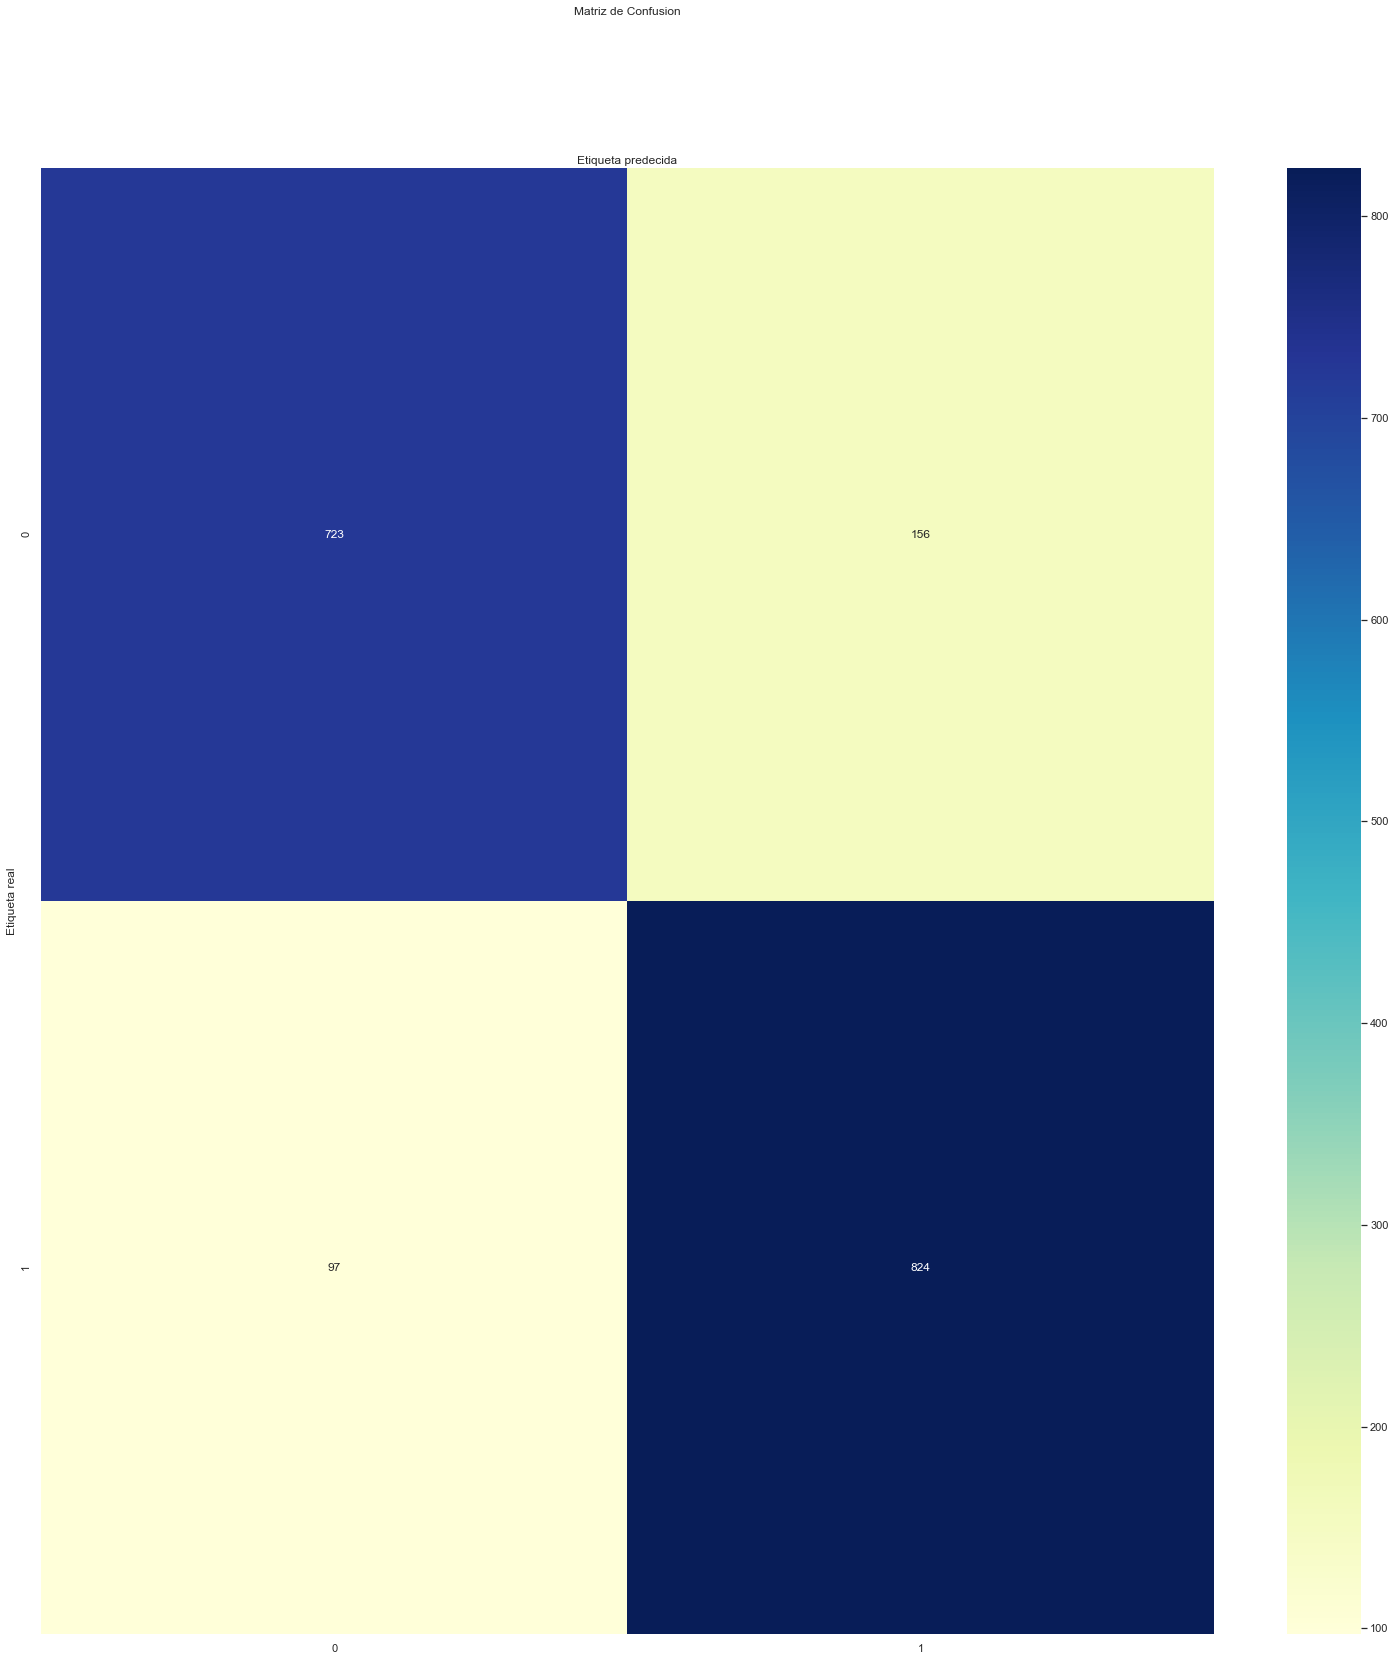

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matriz), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predecida')


In [20]:
# Se genera la estimación de las métricas que se usan para medir el desempeño
# en clasificadores
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy del modelo de regresion logistica: "+str(accuracy_score(y_test,yp)))
print("Precision del modelo de regresion logistica: "+str(precision_score(y_test,yp)))
print("Recall del modelo de regresion logistica: "+str(recall_score(y_test,yp)))

Accuracy del modelo de regresion logistica: 0.8594444444444445
Precision del modelo de regresion logistica: 0.8408163265306122
Recall del modelo de regresion logistica: 0.8946796959826275


In [21]:
# Se hace el ajuste de la maquina de soporte vectorial. 
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
yp= clf.predict(X_test)
cnf_matriz = metrics.confusion_matrix(y_test, yp)

Text(0.5, 1334.56, 'Etiqueta predecida')

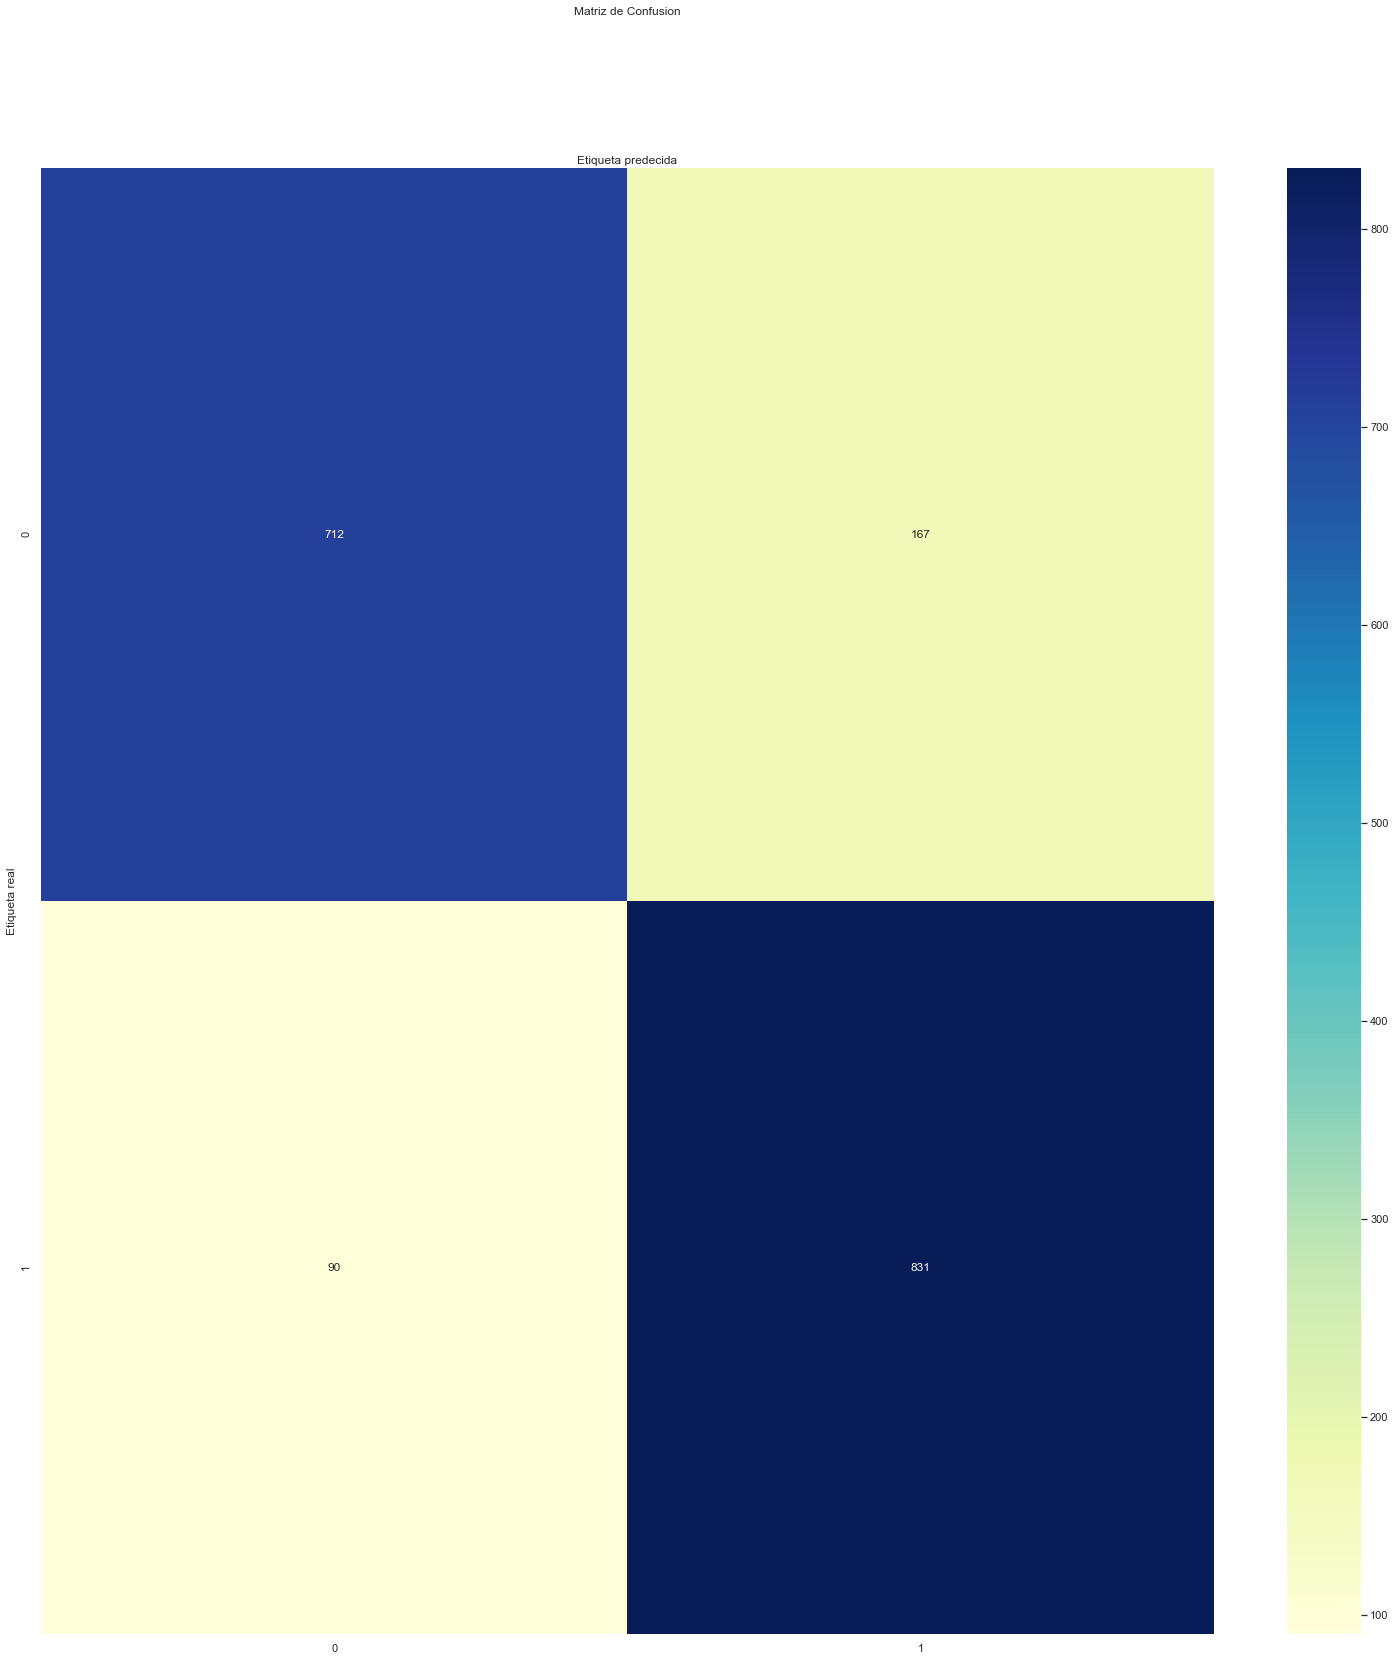

In [101]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap para la maquina de soporte vectorial
sns.heatmap(pd.DataFrame(cnf_matriz), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predecida')

In [23]:
# Se genera la estimación de las métricas que se usan para medir el desempeño
# en clasificadores
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy del modelo de SVM: "+str(accuracy_score(y_test,yp)))
print("Precision del modelo de SVM: "+str(precision_score(y_test,yp)))
print("Recall del modelo de SVM: "+str(recall_score(y_test,yp)))

Accuracy del modelo de SVM: 0.8572222222222222
Precision del modelo de SVM: 0.8326653306613226
Recall del modelo de SVM: 0.9022801302931596


In [24]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
yp= clf.predict(X_test)
cnf_matriz = metrics.confusion_matrix(y_test, yp)

Text(0.5, 1334.56, 'Etiqueta predecida')

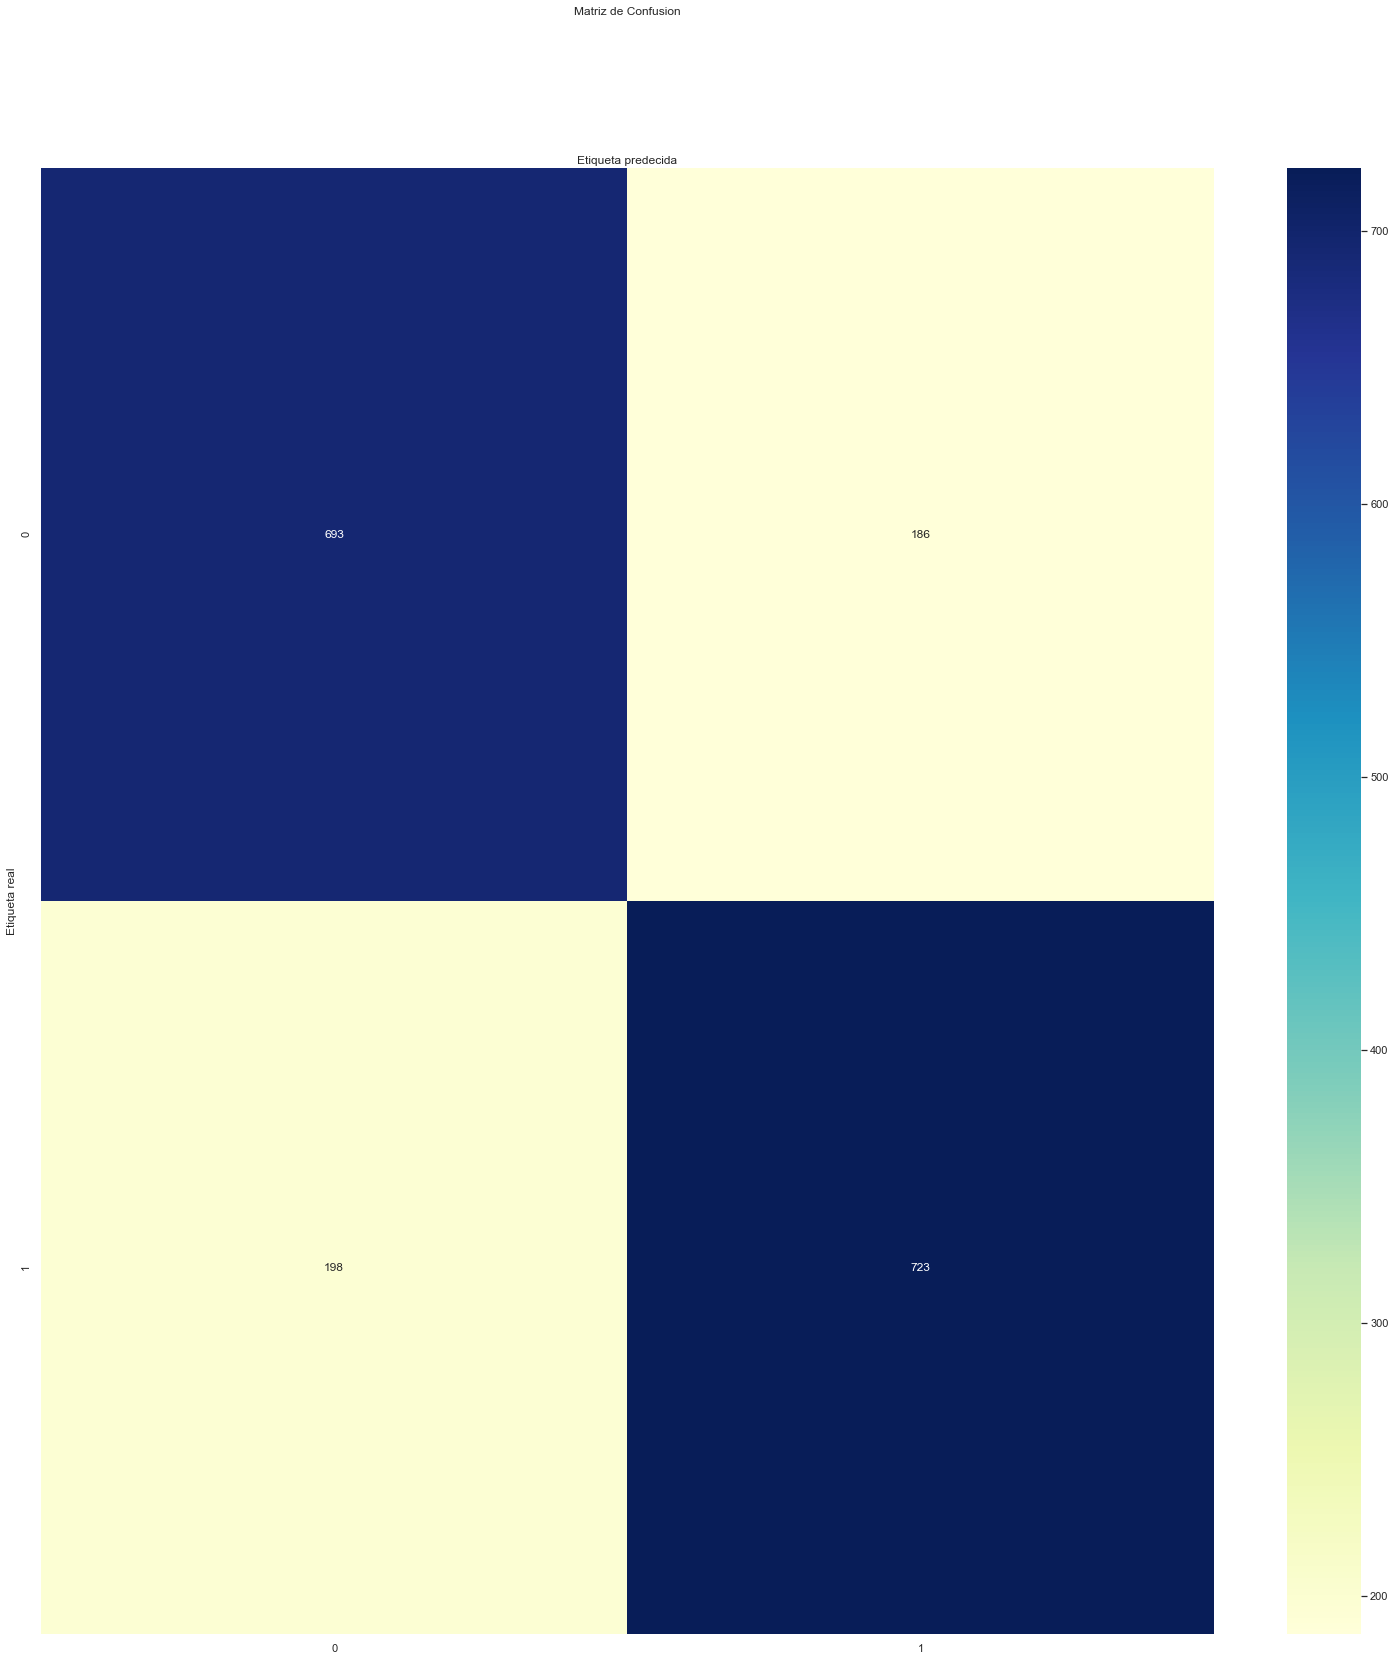

In [103]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matriz), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predecida')

In [25]:
# Se genera la estimación de las métricas que se usan para medir el desempeño
# en clasificadores
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy del modelo de Arbol decision: "+str(accuracy_score(y_test,yp)))
print("Precision del modelo de Arbol decision: "+str(precision_score(y_test,yp)))
print("Recall del modelo de Arbol decision: "+str(recall_score(y_test,yp)))

Accuracy del modelo de Arbol decision: 0.7866666666666666
Precision del modelo de Arbol decision: 0.7902702702702703
Recall del modelo de Arbol decision: 0.7937024972855592


### Comentario:

En esta sección se han hecho. 3 modelos, sin embargo, se probara solo con el gradient boosting, el prcoes de hiperparametrización, ya que este proceso es tardado y computacionalmente costos, y pensando en que el gradient boosting por lo regular es una mejor solución, por eso decidí solo implementarlo aquí y no perder tanto tiempo.

In [30]:
# Lo siguiente se hace para poder generar el espacio de parametros a ser probado,
# el algoritmo implementado es RandomizedSearchCV, se cargan los datos y usando
# la solución de gradientboosting se implementa el proceso de hiperparametrización
# para maximizar el accuracy.
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
# RandomizedSearhCV
param_rand = {'max_depth':[12,24,69,152],
              'max_features':[.72,.81,.9,1],
              'learning_rate':[0.03,0.06,0.09,0.15],
              'n_estimators':[50,100,150,300],
              'subsample':[.72,.81,.9]}
rand = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_rand, scoring='accuracy', cv=6)
rand.fit(X_train,y_train)


RandomizedSearchCV(cv=6, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.03, 0.06, 0.09,
                                                          0.15],
                                        'max_depth': [12, 24, 69, 152],
                                        'max_features': [0.72, 0.81, 0.9, 1],
                                        'n_estimators': [50, 100, 150, 300],
                                        'subsample': [0.72, 0.81, 0.9]},
                   scoring='accuracy')

Text(0.5, 1334.56, 'Etiqueta predecida')

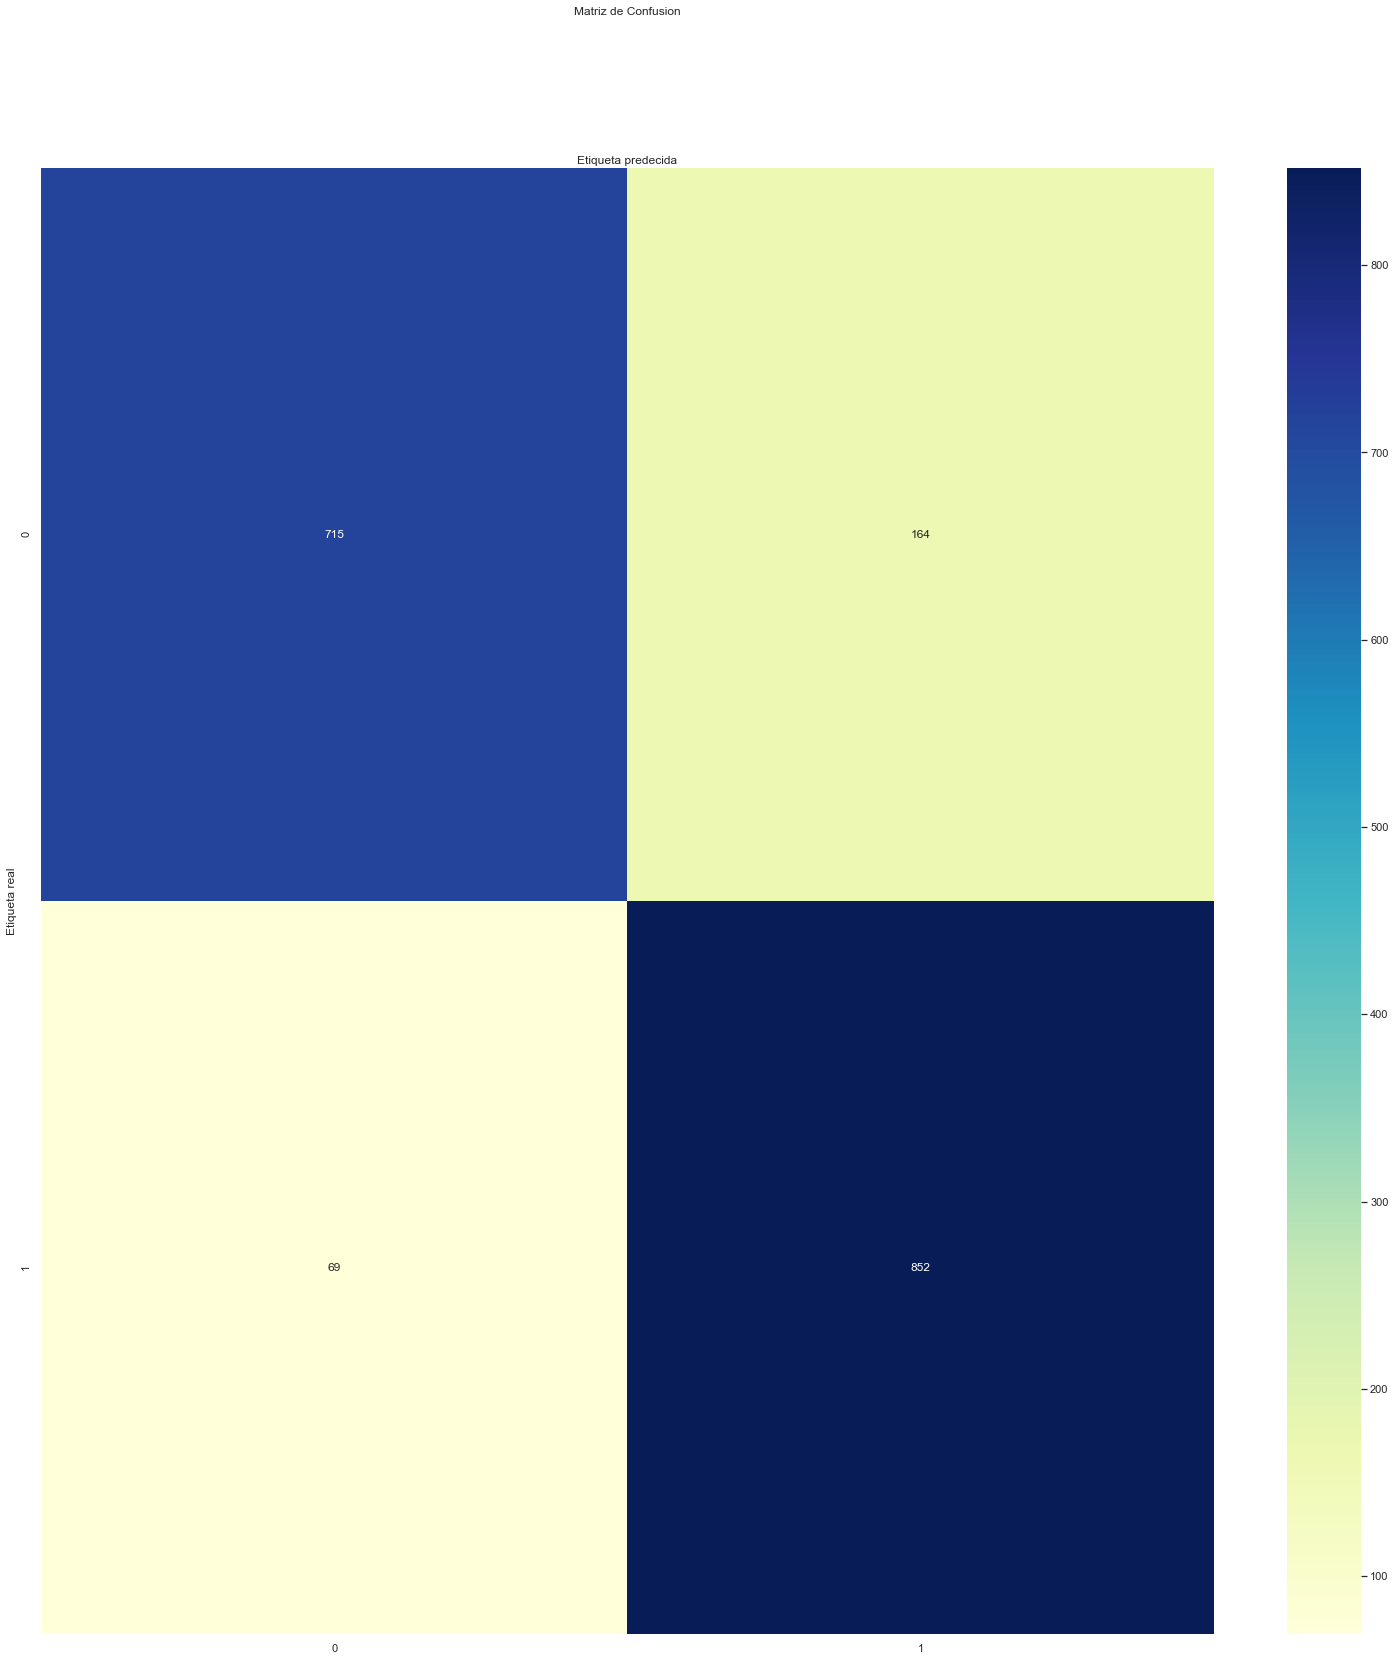

In [31]:
# Una vez que se hace la hiperparametrización, lo que se hace es muy similar
# a lo que se ha hecho en los modelos anteriores, se hace el ajuste del 
# modelo, luego se genera la predicción y se estima la matriz de confusión
yp=rand.predict(X_test)
cnf_matriz = metrics.confusion_matrix(y_test, yp)
ass_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Se crea el heatmap
sns.heatmap(pd.DataFrame(cnf_matriz), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predecida')

In [32]:
# Se genera la estimación de las métricas que se usan para medir el desempeño
# en clasificadores
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy del modelo de Gradient Boosting: "+str(accuracy_score(y_test,yp)))
print("Precision del modelo de Gradient Boosting: "+str(precision_score(y_test,yp)))
print("Recall del modelo de Gradient Boosting: "+str(recall_score(y_test,yp)))

Accuracy del modelo de Gradient Boosting: 0.8705555555555555
Precision del modelo de Gradient Boosting: 0.8385826771653543
Recall del modelo de Gradient Boosting: 0.9250814332247557


## Conclusión:

En términos generales se hizo todo lo solicitado, adicional y como se había comentado en el trabajo anterior, se hizo la hiperparametrización para el modelo de GradientBoosting, esto fue un poco complicado, ya que bajo la prueba de esos parámetros tomo al rededor de 2 horas y 30 minutos, y considero que el resultado fue muy bueno, pienso que al menos para este modelo un paso siguiente podría ser ampliar el espacio de hiperparametros pero considerando paralelización. Por otro lado, también se puede considerar la implementación de la librería de autosklearn, la cual puede ahorrar tiempo y recursos computacionales, ademas de todo el proceso de prueba de diferentes modelos. En términos generales los resultados fueron buenos, al menos en 3 de los 4 modelos probados se tuvieron accuracies altos, mayores al 85%, y por otro lado el modelo de hiperparametrización mostro el mejor recall de todos los modelos, lo cual nos muestra que en general funciono el proceso de hiperparametrización, pero considerando el uso de los recursos computacionales y el tiempo que tomo, honestamente me quedaría con la solución de regresión logistica, la cual tomo muy poco tiempo y recursos computacionales. En retrospectiva mucho de lo que vimos en los cursos de Kaggle se uso para analizar los datos, hacer el tratamiento de los datos faltantes, y considerar tambien reducción de dimensiones, para finalmente obtener una solución buena y sobre todo una conclusión. Cabe remarcar, que al menos desde mi punto de vista, la solución fue muy buena, considerando que desconociamos totalmente la naturaleza de los datos de las variables que se extrajeron de kaggle, mas aun, solo se contó con una descripción pero fuera de eso desconociamos sus valores reales y hace este desarrollo sin ese contexto tan valioso resulta complejo.  